In [2]:
pip install pydmd 

In [5]:
#https://github.com/mathLab/PyDMD/blob/master/tutorials/tutorial-1-dmd.ipynb
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from pydmd import DMD

In [20]:
def f1(x,t): 
    return 1./np.cosh(x+3)*np.exp(2.3j*t)
def f2(x,t):
    return 2./np.cosh(x)*np.tanh(x)*np.exp(2.8j*t)
x = np.linspace(-5, 5, 65)
t = np.linspace(0, 4*np.pi, 129)
xgrid, tgrid = np.meshgrid(x, t)
X1 = f1(xgrid, tgrid)
X2 = f2(xgrid, tgrid)
X = X1 + X2

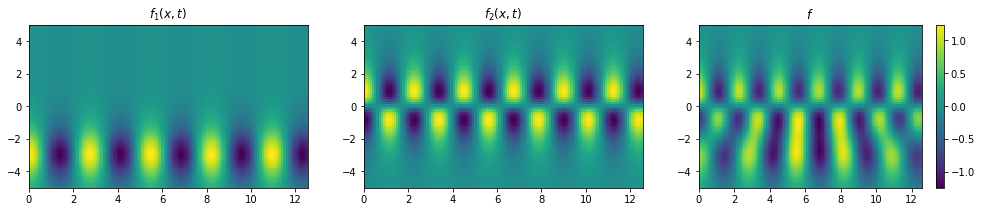

In [21]:
titles = ['$f_1(x,t)$', '$f_2(x,t)$', '$f$']
data = [X1, X2, X]
fig = plt.figure(figsize=(17, 3))
for n, title, d in zip(range(131, 134), titles, data):
    plt.subplot(n)
    plt.pcolor(tgrid, xgrid, d.real)
    plt.title(title)
plt.colorbar()
plt.show()

In [27]:
dmd = DMD(svd_rank=2)
dmd.fit(X.T)

Eigenvalue (0.9624552364536475+0.271440449865074j): distance from unit circle 0.0
Eigenvalue (0.9746148685640456+0.22388804785849845j): distance from unit circle 4.440892098500626e-16


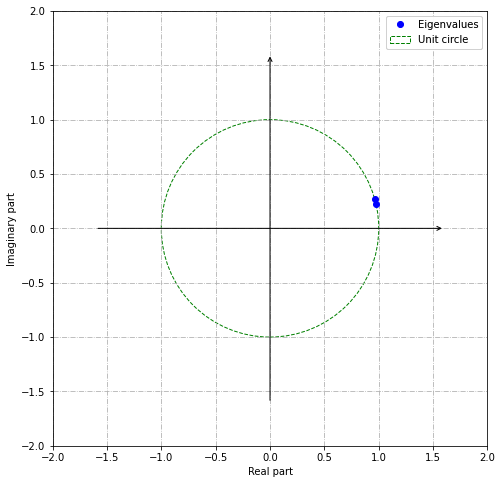

In [28]:
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(np.sqrt(eig.imag**2+eig.real**2) - 1)))
dmd.plot_eigs(show_axes=True, show_unit_circle=True)

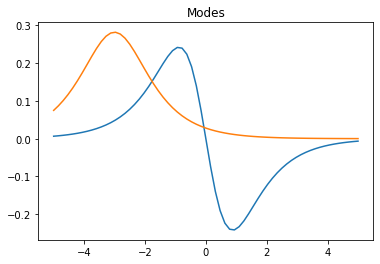

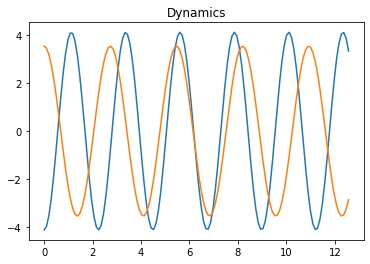

In [29]:
for mode in dmd.modes.T:
    plt.plot(x, mode.real)
    plt.title('Modes')
plt.show()
for dynamic in dmd.dynamics:
    plt.plot(t, dynamic.real)
    plt.title('Dynamics')
plt.show()

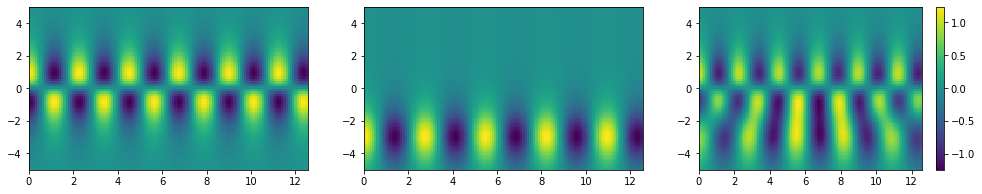

In [30]:
fig = plt.figure(figsize=(17,3))
for n, mode, dynamic in zip(range(131, 133), dmd.modes.T, dmd.dynamics):
    plt.subplot(n)
    plt.pcolor(tgrid, xgrid, (mode.reshape(-1, 1).dot(dynamic.reshape(1, -1))).real.T)
    
plt.subplot(133)
plt.pcolor(tgrid, xgrid, dmd.reconstructed_data.T.real)
plt.colorbar()
plt.show()

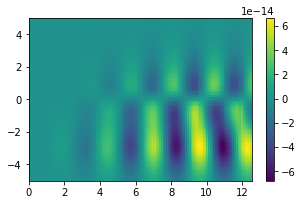

In [31]:
fig = plt.figure(figsize=(5,3))
plt.pcolor(tgrid, xgrid, (X-dmd.reconstructed_data.T).real)
fig = plt.colorbar()